# Forecast verification
This is the main notebook of the study containing all the skill assessments.

* **Most use seasonal averages for verification. How to best aggregate data? Needed in daily resolution for hindcast. Initial timestep of model = 20 mins (correct?)... if I aggregate to seasonal averages I could have just as well downloaded the monthly aggregated data firsthand and not bothered with the large daily dataset... how can daily data be considered in the analysis?**
* see "Effective Sample Size" -> should I use it? see https://doi.org/10.1175/1520-0442(1999)012<1990:TENOSD>2.0.CO;2  Also compute the p values! Understand how this is used in forecast verification!

* Check more verification datasets in one HindcastEnsemble? [Note](https://youtu.be/EcMxImmMBec?t=8526) more than one verification dataset can be carried along! This allows to compare the skill for multiple observational datasets.

# Misc TODO

## Climpred things
* Make sure that your init and lead dimensions align.* --> maybe I need to have the same number of init dates as lead timesteps. Try the xarray align method??? See https://climpred.readthedocs.io/en/stable/quick-start.html
* Check: [Note](https://youtu.be/EcMxImmMBec?t=8647) a skill dimension is appended to the HindcastEnsemble object which allows to compare the skills of the forecast product and the skill of the reference forecast (e.g. persistence) -> good plot of the spatial distribution of skill in two rows, one for the forecast product and the other one for the reference product
* --> just not sure how e.g. the ACC is computed then if we are not even in anomaly space. Does climpred actually compute anomalies?

## EOF analysis
* compute the EOFs
    * https://ajdawson.github.io/eofs/latest/
    * read Wilks chapter

## Detrending
* https://climpred.readthedocs.io/en/stable/api/climpred.stats.rm_poly.html#climpred.stats.rm_poly
    * or better in XCLIM or straight away in Xarray?
    * see here: https://youtu.be/SKXUBD6DGao?t=563
* I will probably not need to worry about detrending at seasonal timescales... where is literature which specifies at which time intervals detrending becomes relevant? Do I need to justify?


In [5]:
# %%time
# # set up a local dask cluster for parallelisation and accessing the dashboard
# from dask.distributed import Client, LocalCluster
# cluster = LocalCluster()  # Launches a scheduler and workers locally
# client = Client(cluster)  # Connect to distributed cluster and override default
# # client = Client(address="127.0.0.1:8787")
# client

C:\Users\sb123\.conda\envs\Thesis2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data amount of ERA5 seems to be OK to handle: 831699 datapoints. Shape: (8401, 9, 11)

The ERA5 data still contains some very small negative values, which are replaced with zeros in the next step:
-8.940698171500117e-05 

Now the data looks good
Max. daily precipitation: 94.08016967773438
Min. daily precipitation: 0.0 

CPU times: total: 406 ms
Wall time: 1.08 s


[Text(0.5, 1.0, 'ERA5 pr histogram')]

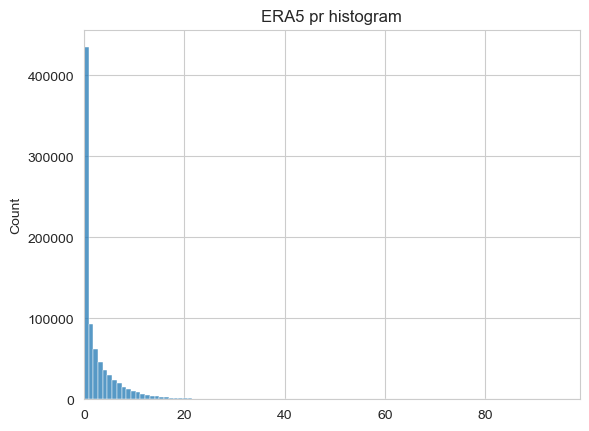

Some strange outliers (daily tp in mm):
5670.3594
6535.2783
6623.678
5666.382
6229.126
6399.17
5302.9785
3352.7646
5862.3457
5353.4746
5412.4756
6513.3564
5784.5796
5043.348
5590.088
6354.208
5675.171
4959.3506
5357.666
5292.9688
A total of 20 of 276 datasets was rejected.
136224000 data points... quite a bit of data! Shape: (256, 25, 9, 11, 215)
Just like the observations the forecasts also contain negative pr values:
Min. -0.2396106719970703 

Now the data looks good
Max. daily precipitation: 135.79415893554688
Min. daily precipitation: 0.0 



C:\Users\sb123\.conda\envs\Thesis2\lib\site-packages\climpred\classes.py:987: UserWarning: HindcastEnsemble is chunked along dimensions ['init'] with more than one chunk. `HindcastEnsemble.chunks=Frozen({'init': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), 'member': (25,), '

INFO:root:initialized | lead: 01 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-02 00:00:00-2016-05-02 00:00:00
INFO:root:initialized | lead: 02 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-03 00:00:00-2016-05-03 00:00:00
INFO:root:initialized | lead: 03 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-04 00:00:00-2016-05-04 00:00:00
INFO:root:initialized | lead: 04 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-05 00:00:00-2016-05-05 00:00:00
INFO:root:initialized | lead: 05 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-06 00:00:00-2016-05-06 00:00:00
INFO:root:initialized | lead: 06 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-07 00:00:00-2016-05-07 00:00:00
INFO:root:initialized | lead: 07 | inits: 1994-01-01 00:00:00-2016-05-01 00:00:00 | verifs: 1994-01-08 00:00:00-2016-05-08 00:00:00
INFO:root:initialized | lead: 08 | inits: 1994-01-01 00:00:00-2016-05-01 00:

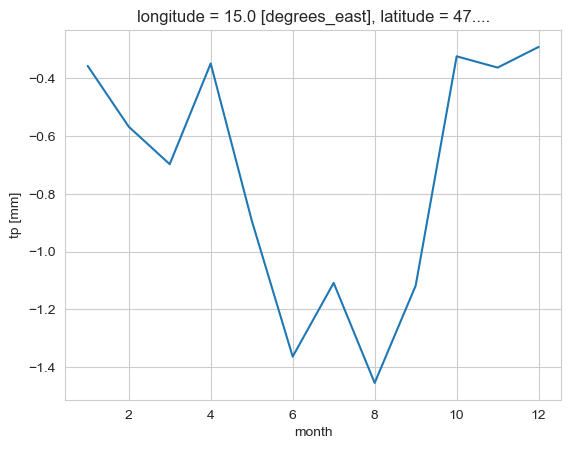

C:\Users\sb123\AppData\Local\Temp\ipykernel_17684\2177946862.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


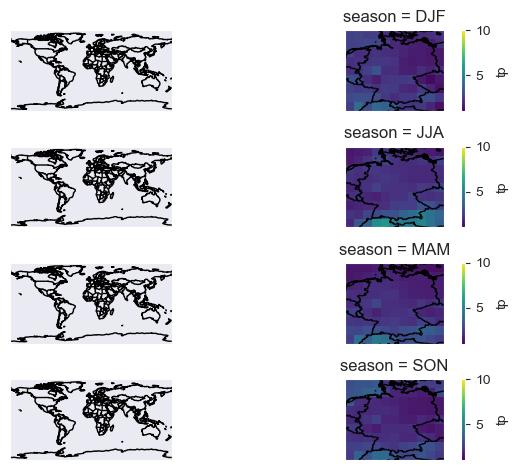

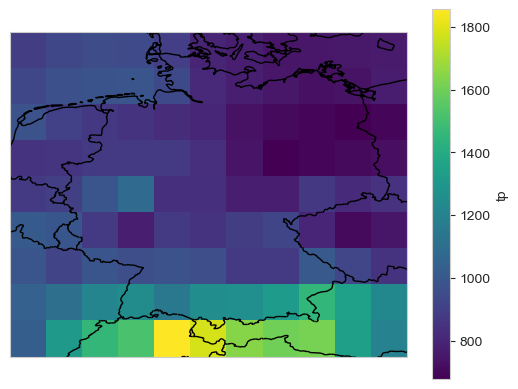

In [18]:
# instantiate a climpred HindcastEnsemble object


# Testing only:
# hc = hc.assign_coords({"month" : hc.init.dt.month.values}) # for testing to
# filter for inits on a specific month to compare results against https://meteoswiss-climate.shinyapps.io/skill_metrics/


C:\Users\sb123\.conda\envs\Thesis2\lib\site-packages\climpred\classes.py:987: UserWarning: HindcastEnsemble is chunked along dimensions ['init'] with more than one chunk. `HindcastEnsemble.chunks=Frozen({'init': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), 'member': (25,), '

TypeError: 'function' object is not iterable

In [ ]:
convert_init_lead_to_valid_time_lead(hindcast.get_initialized())

In [ ]:
# Doing some visualisations and plausibility checks on our climpred
# HindcastEnsemble

# fig, ax = plt.subplots()
data = hindcast.get_observations().tp.values.flat
# import numpy as np
data[np.where(data < 0)[0]]

# sns.histplot(data=hindcast.get_observations().tp.values[:,0,0])

In [ ]:
%time
#
verification_e2o = hindcast.verify(
    metric="pearson_r", comparison="e2o", dim="init", alignment="same_inits"
)

In [ ]:
verification_e2o

**Check, do I still have a member dimension when verifying with m2o?**

**ToDo:** Also calculate the p - values and research the underlying
methodology (see Wilks 2019)

Da läuft noch was schief mit den Verification Alignments

In [ ]:
fig, ax = plt.subplots(
    ncols=2, figsize=(10, 5), subplot_kw={"projection": ccrs.PlateCarree()}
)
verification.sel({"lead": 1})["tp"].plot(ax=ax[0], vmin=0, vmax=0.6)
verification.sel({"lead": 100})["tp"].plot(ax=ax[1], vmin=0, vmax=0.6)

for ax in ax.flatten():
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
plt.tight_layout()

In [ ]:
verification.dims

In [ ]:
fig, ax = plt.subplots()
y = verification.tp.sel({"longitude": 5, "latitude": 55}).values
x = verification.lead.values
ax.plot(x, y)
fig.show()

# TODO compute manually and compare the graphs!

In [ ]:
verification.tp.shape

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
verification.tp.sel({"lead": 30}).plot(ax=ax)
ax.add_feature(cfeature.COASTLINE)
fig.show()

In [ ]:
verification.tp.sel({"lead": 30})